## Draw example time series: 3 DFs in a 3-week window from BPI2017

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from pyarrow import dictionary

In [3]:
# load time series data
dataset = 'BPI2017'
df = pd.read_hdf('../data/processed/time_series_df.h5', key=dataset)

In [4]:
df

,▶ -> O_Create Offer,O_Create Offer -> O_Created,O_Created -> O_Sent (mail and online),O_Sent (mail and online) -> O_Cancelled,O_Cancelled -> ■,O_Sent (mail and online) -> O_Returned,O_Returned -> O_Accepted,O_Accepted -> ■,O_Created -> O_Cancelled,O_Created -> O_Sent (online only),...,O_Returned -> O_Refused,O_Refused -> ■,O_Sent (mail and online) -> O_Refused,O_Returned -> O_Cancelled,O_Sent (online only) -> O_Cancelled,O_Returned -> ■,O_Sent (online only) -> O_Refused,O_Created -> O_Refused,O_Sent (mail and online) -> ■,O_Sent (online only) -> ■
2016-02-10 00:00:00+00:00,113,113,104,27,30,77,63,46,4,5,...,17,16,2,6,2,0,0,0,0,0
2016-02-11 00:00:00+00:00,142,142,130,52,62,71,41,47,5,7,...,4,16,5,9,5,0,0,0,0,0
2016-02-12 00:00:00+00:00,73,73,66,20,47,42,64,42,1,6,...,9,18,6,11,0,0,3,0,0,0
2016-02-13 00:00:00+00:00,80,80,77,34,12,39,0,0,1,2,...,2,0,4,1,0,0,2,0,0,0
2016-02-14 00:00:00+00:00,0,0,0,0,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-20 00:00:00+00:00,148,148,128,7,73,7,54,35,5,10,...,8,27,0,6,0,0,1,0,0,0
2016-12-21 00:00:00+00:00,114,114,101,0,23,4,51,36,2,10,...,12,19,0,4,2,0,0,0,1,0
2016-12-22 00:00:00+00:00,89,89,78,2,213,2,40,363,3,6,...,10,16,0,2,0,2,0,1,0,0
2016-12-23 00:00:00+00:00,86,86,76,0,87,1,23,71,1,7,...,6,21,0,0,0,1,0,0,1,0


In [3]:
df_short = df.loc['2016-07-04':'2016-07-24']
selected_columns = ['O_Sent (mail and online) -> O_Cancelled',  'O_Sent (mail and online) -> O_Returned', 'O_Returned -> O_Accepted']
df_selected = df_short[selected_columns].copy()

In [28]:
date_index = df_selected.index
week1_idx = min(6, len(date_index) - 1)  # Ensure we don't exceed index bounds
week1_Sunday = date_index[week1_idx]
week2_Monday = date_index[week1_idx + 1]
week1_boundary = pd.Timestamp(week1_Sunday.to_pydatetime() +
                     (week2_Monday.to_pydatetime() - week1_Sunday.to_pydatetime())/2)

In [30]:
week1_Sunday

Timestamp('2016-07-10 00:00:00+0000', tz='UTC')

In [68]:
def plot_selected_time_series(df: pd.DataFrame, dataset: str, output_dir: Path):
    """Plot all time series in a single plot and save to PDF"""

    # Create output directory if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)
    pdf_path = output_dir / f"{dataset}_selected_time_series.pdf"

    # Set style for better visualization
    plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name
    sns.set_theme()  # Set seaborn defaults

    # Increase font sizes globally
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
    })

    # Create figure
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot all time series with bolder lines
    for column in df.columns:
        df[column].plot(ax=ax, label=column, alpha=0.8, linewidth=3)

    # Customize the plot
    ax.set_title(f"{dataset}: 3 DF time series in a 3-week window", pad=20, fontweight='bold')
    ax.set_xlabel("Time", fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add legend at upper-middle right (top 30% position) with bold frame
    legend = ax.legend(loc='center right', bbox_to_anchor=(1.0, 0.7), frameon=True)
    legend.get_frame().set_linewidth(1.5)

    # # Add legend at the right middle with bold frame
    # legend = ax.legend(loc='center right', frameon=True)
    # legend.get_frame().set_linewidth(1.5)

    # Make tick labels bolder
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')

    # Get date index and calculate week boundaries
    # For data starting on Monday, weeks end after 6.5 and 13.5 days
    date_index = df.index

    if len(date_index) > 6:
        # First week boundary (Sunday/Monday between weeks 1-2)
        week1_idx = min(6, len(date_index) - 1)  # Ensure we don't exceed index bounds
        week1_Sunday = date_index[week1_idx]

        if week1_idx + 1 < len(date_index):
            week2_Monday = date_index[week1_idx + 1]
            # Calculate midpoint between Sunday and Monday
            week1_boundary = week1_Sunday + (week2_Monday - week1_Sunday) / 2
        else:
            week1_boundary = week1_Sunday

        ax.axvline(x=week1_boundary, color='black', linestyle=':', linewidth=2, alpha=0.7)

        # Add text for Week 1
        y_min, y_max = ax.get_ylim()
        y_text = y_max * 0.95
        mid_week1_idx = min(3, len(date_index) - 1)
        ax.text(date_index[mid_week1_idx], y_text, 'Week 1', fontsize=14, fontweight='bold',
                ha='center', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    if len(date_index) > 13:
        # Second week boundary (Sunday/Monday between weeks 2-3)
        week2_idx = min(13, len(date_index) - 1)
        week2_Sunday = date_index[week2_idx]

        if week2_idx + 1 < len(date_index):
            week3_Monday = date_index[week2_idx + 1]
            # Calculate midpoint between Sunday and Monday
            week2_boundary = week2_Sunday + (week3_Monday - week2_Sunday) / 2
        else:
            week2_boundary = week2_Sunday

        ax.axvline(x=week2_boundary, color='black', linestyle=':', linewidth=2, alpha=0.7)

        # Add text for Week 2
        mid_week2_idx = min(10, len(date_index) - 1)
        ax.text(date_index[mid_week2_idx], y_text, 'Week 2', fontsize=14, fontweight='bold',
                ha='center', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        # Add text for Week 3
        if len(date_index) > 14:
            mid_week3_idx = min(17, len(date_index) - 1)
            ax.text(date_index[mid_week3_idx], y_text, 'Week 3', fontsize=14, fontweight='bold',
                    ha='center', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Save to PDF
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(fig, bbox_inches='tight')

        # Add metadata
        d = pdf.infodict()
        d['Title'] = f'Combined Time Series Plot - {dataset}'
        d['Subject'] = 'Time Series Visualization'

    plt.close(fig)

In [69]:
output_dir = Path('../results/plots')
plot_selected_time_series(df_selected, 'BPI2017', output_dir)

## Draw Mulitple Predictions with Ground Truth

In [ ]:
def extract_ground_truth(df: pd.DataFrame,
                        start_date: str,
                        columns: list = None) -> pd.DataFrame:
    """
    Extract ground truth data for the specified time range and columns.

    Parameters:
    -----------
    df : pd.DataFrame
        The original dataframe containing time series data
    start_date : str
        Start date in format 'YYYY-MM-DD'
    end_date : str
        End date in format 'YYYY-MM-DD'
    columns : list, optional
        List of column names to extract. If None, all columns are extracted.

    Returns:
    --------
    pd.DataFrame
        DataFrame with the selected time range and columns
    """
    df_slice = df.loc[start_date:].copy()

    if columns is not None:
        df_slice = df_slice[columns]

    return df_slice


In [72]:
data_file = '../data/processed/time_series_df.h5'
data = pd.read_hdf(truth_file, key=dataset)

In [73]:
slice_date = '2016-10-29'
truth = data.loc[slice_date:].copy()

In [80]:
pred_path = '../results/BPI2017/horizon_7/predictions/'
arima_pred = pd.read_parquet(Path(pred_path) / 'statistical' / 'arima_last_predictions.parquet')
rf_pred = pd.read_parquet(Path(pred_path) / 'regression' / 'random_forest_last_predictions.parquet')
lstm_pred = pd.read_parquet(Path(pred_path) / 'deep_learning' / 'lstm_last_predictions.parquet')

In [110]:
arima_pred['O_Returned -> O_Accepted']

time
2016-10-28    33.480415
2016-10-29    15.864413
2016-10-30    15.376011
2016-10-31    40.105078
2016-11-01    30.600737
2016-11-02    29.832551
2016-11-03    22.682915
2016-11-04    25.998517
2016-11-05    -1.000000
2016-11-06    10.989371
2016-11-07    31.309805
2016-11-08    24.220497
2016-11-09    23.842516
2016-11-10    19.381780
2016-11-11    20.359863
2016-11-12    17.174177
2016-11-13    10.591938
2016-11-14    34.948595
2016-11-15    30.366603
2016-11-16    31.840187
2016-11-17    29.736940
2016-11-18    34.848765
2016-11-19    19.757779
2016-11-20    16.630139
2016-11-21    48.832462
2016-11-22    37.910212
2016-11-23    21.188818
2016-11-24    21.088658
2016-11-25    21.368534
2016-11-26    20.638351
2016-11-27    20.752109
2016-11-28    21.052790
2016-11-29    20.928674
2016-11-30    21.268514
2016-12-01    21.075412
2016-12-02    21.433028
2016-12-03    20.741506
2016-12-04    20.798212
2016-12-05    21.113871
2016-12-06    20.942756
2016-12-07    21.362707
2016-12-08 

<Axes: >

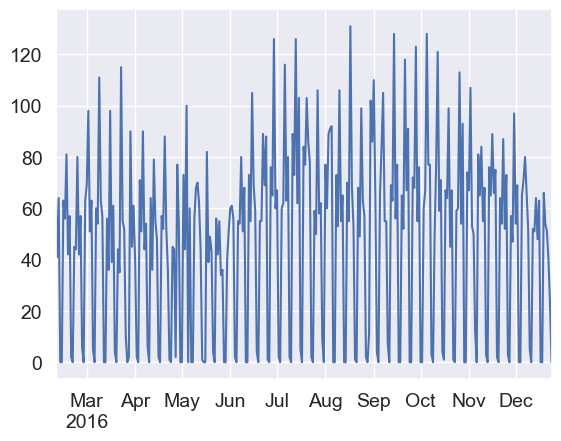

In [111]:
data['O_Returned -> O_Accepted'].plot()

In [95]:
pred_combined = {}
pred_combined['ARIMA'] = arima_pred
pred_combined['Random Forest'] = rf_pred
pred_combined['LSTM'] = lstm_pred

In [108]:
def plot_model_predictions(df_true: pd.DataFrame,
                          df_predictions: dict,
                          dataset: str,
                          output_dir: Path,
                          series_names: list = None):
    """
    Plot time series predictions from multiple models alongside ground truth.

    Parameters:
    -----------
    df_true : pd.DataFrame
        DataFrame containing the ground truth values
    df_predictions : dict
        Dictionary with keys as model names and values as DataFrames with predictions
        e.g., {'ARIMA': arima_preds_df, 'RF': rf_preds_df, 'LSTM': lstm_preds_df}
    dataset : str
        Name of the dataset
    output_dir : Path
        Directory to save the output PDF
    series_names : list, optional
        List of specific series names to plot. If None, plots all series.
    """
    # Create output directory if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)

    # Set style for better visualization
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.set_theme()

    # Increase font sizes globally
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
    })

    # Define colors for each model
    colors = {
        'Ground Truth': 'black',
        'ARIMA': 'blue',
        'Random Forest': 'green',
        'LSTM': 'red'
    }

    # Define line styles for each model
    line_styles = {
        'Ground Truth': '-',
        'ARIMA': ':',
        'Random Forest': '-.',
        'LSTM': '--'
    }

    # Define model order for legend
    model_order = ['Ground Truth', 'ARIMA', 'Random Forest', 'LSTM']

    # Get the series names to plot
    if series_names:
        # Use provided list of series names
        plot_series = [s for s in series_names if s in df_true.columns]
    else:
        # Use all columns in the ground truth dataframe
        plot_series = df_true.columns

    # Create PDFs for each series
    for series in plot_series:
        pdf_path = output_dir / f"{dataset}_{series.replace(' ', '_')}_model_predictions.pdf"

        # Create figure
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot ground truth
        df_true[series].plot(ax=ax,
                            label='Ground Truth',
                            color=colors['Ground Truth'],
                            linewidth=3,
                            linestyle=line_styles['Ground Truth'])

        # Plot predictions from each model
        for model_name, df_pred in df_predictions.items():
            if model_name != 'split_date' and series in df_pred.columns:
                df_pred[series].plot(ax=ax,
                                    label=model_name,
                                    color=colors.get(model_name, 'purple'),
                                    linewidth=2.5,
                                    linestyle=line_styles.get(model_name, '--'),
                                    alpha=0.8)

        # Customize the plot
        ax.set_title(f"{dataset}: {series}", pad=20, fontweight='bold')
        ax.set_xlabel("Time", fontweight='bold')
        ax.set_ylabel("Value", fontweight='bold')
        ax.grid(True, alpha=0.3)

        # Add legend with custom ordering
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ordered_labels = [label for label in model_order if label in labels]
        ordered_handles = [by_label[label] for label in ordered_labels]

        legend = ax.legend(ordered_handles, ordered_labels,
                         loc='upper right',
                         # bbox_to_anchor=(1.0, 0.95),
                         frameon=True)
        legend.get_frame().set_linewidth(1.5)

        # Make tick labels bolder
        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontweight('bold')

        # Add shaded training/test split area if applicable
        if 'split_date' in df_predictions:
            split_date = df_predictions['split_date']
            ax.axvline(x=split_date, color='purple', linestyle='--', linewidth=1.5)
            ax.text(split_date, ax.get_ylim()[1]*0.95, 'Train-Test Split',
                   rotation=90, ha='right', va='top', fontweight='bold',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        # Adjust layout
        plt.tight_layout()

        # Save to PDF
        with PdfPages(pdf_path) as pdf:
            pdf.savefig(fig, bbox_inches='tight')

            # Add metadata
            d = pdf.infodict()
            d['Title'] = f'Model Predictions - {dataset} - {series}'
            d['Subject'] = 'Time Series Prediction Comparison'

        plt.close(fig)

    print(f"Model prediction plots saved to {output_dir}")

In [109]:
plot_model_predictions(truth, pred_combined, dataset, output_dir, selected_columns)

Model prediction plots saved to ../results/plots


## Plot each time series across datasets#

In [11]:
# dataset = 'Hospital_Billing'
# dataset = 'RTFMP'
dataset = 'BPI2019_1'
df = pd.read_hdf('../data/processed/time_series_df.h5', key=dataset)
output_dir = Path('../results/plots')

In [12]:
def plot_time_series(df: pd.DataFrame, dataset: str, output_dir: Path):
    """Plot each time series and save to PDF"""
    # Create output directory if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)
    pdf_path = output_dir / f"{dataset}_time_series_plots.pdf"

    # Set style for better visualization
    plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name
    sns.set_theme()  # Set seaborn defaults

    # Increase font sizes globally
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
    })

    # Calculate number of columns for better visualization
    n_series = len(df.columns)

    # Create PDF
    with PdfPages(pdf_path) as pdf:
        # Plot each time series separately
        for column in df.columns:
            fig, ax = plt.subplots(figsize=(12, 6))

            # Plot the time series with bolder line
            df[column].plot(ax=ax, linewidth=2.5)

            # Customize the plot
            ax.set_title(f"{dataset}: {column}", pad=20, fontweight='bold')
            ax.set_xlabel("Time", fontweight='bold')
            ax.set_ylabel("Value", fontweight='bold')
            ax.grid(True, alpha=0.3)

            # Make tick labels bolder
            for tick in ax.get_xticklabels() + ax.get_yticklabels():
                tick.set_fontweight('bold')

            # Adjust layout
            plt.tight_layout()

            # Save to PDF
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)

        # Add metadata to PDF
        d = pdf.infodict()
        d['Title'] = f'Time Series Plots - {dataset}'
        d['Subject'] = 'Time Series Visualization'

In [13]:
plot_time_series(df, dataset, output_dir)

/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_2862/781181782.py:44: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_2862/781181782.py:47: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig, bbox_inches='tight')
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_2862/781181782.py:47: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig, bbox_inches='tight')
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_2862/781181782.py:44: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_2862/781181782.py:47: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig, bbox_inches='t

In [28]:
# output_dir = Path('../results/plots')
# plot_time_series(df, dataset, output_dir)

/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:32: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:35: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig)
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:35: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig)
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:32: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:35: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig)
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn

shorten the time frame to July 4, 2016 ~ July 24, 2016

In [11]:
# df_short = df.loc['2016-07-04':'2016-07-24']

In [12]:
# plot_time_series(df_short, 'BPI2017_short', output_dir)

/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:32: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:35: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig)
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_28196/3660181594.py:35: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig)


In [14]:
# plot_combined_time_series(df_short, 'BPI2017_short', output_dir)

/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_24527/2667503029.py:33: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_24527/2667503029.py:37: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig, bbox_inches='tight')
/var/folders/mt/5h6lnpgn3j91r3p_y4f2n8hm0000gn/T/ipykernel_24527/2667503029.py:37: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  pdf.savefig(fig, bbox_inches='tight')


In [13]:
# def plot_combined_time_series(df: pd.DataFrame, dataset: str, output_dir: Path):
#     """Plot all time series in a single plot and save to PDF"""
#
#     # Create output directory if it doesn't exist
#     output_dir.mkdir(parents=True, exist_ok=True)
#     pdf_path = output_dir / f"{dataset}_combined_time_series.pdf"
#
#     # Set style for better visualization
#     plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name
#     sns.set_theme()  # Set seaborn defaults
#
#     # Create figure
#     fig, ax = plt.subplots(figsize=(15, 8))
#
#     # Plot all time series
#     for column in df.columns:
#         df[column].plot(ax=ax, label=column, alpha=0.7)
#
#     # Customize the plot
#     ax.set_title(f"{dataset} - All Time Series", pad=20)
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Value")
#     ax.grid(True, alpha=0.3)
#
#     # Add legend inside the plot in the upper right corner
#     ax.legend(loc='upper right', fontsize='small')
#
#     # Rotate x-axis labels
#     plt.xticks(rotation=45)
#
#     # Adjust layout to prevent label cutoff
#     plt.tight_layout()
#
#     # Save to PDF
#     with PdfPages(pdf_path) as pdf:
#         pdf.savefig(fig, bbox_inches='tight')
#
#         # Add metadata
#         d = pdf.infodict()
#         d['Title'] = f'Combined Time Series Plot - {dataset}'
#         d['Subject'] = 'Time Series Visualization'
#
#     plt.close(fig)

In [15]:
df_short.columns

Index(['▶ -> O_Create Offer', 'O_Create Offer -> O_Created',
       'O_Created -> O_Sent (mail and online)',
       'O_Sent (mail and online) -> O_Cancelled', 'O_Cancelled -> ■',
       'O_Sent (mail and online) -> O_Returned', 'O_Returned -> O_Accepted',
       'O_Accepted -> ■', 'O_Created -> O_Cancelled',
       'O_Created -> O_Sent (online only)',
       'O_Sent (online only) -> O_Returned', 'O_Returned -> O_Refused',
       'O_Refused -> ■', 'O_Sent (mail and online) -> O_Refused',
       'O_Returned -> O_Cancelled', 'O_Sent (online only) -> O_Cancelled',
       'O_Returned -> ■', 'O_Sent (online only) -> O_Refused',
       'O_Created -> O_Refused', 'O_Sent (mail and online) -> ■',
       'O_Sent (online only) -> ■'],
      dtype='object')

select 3 DFs in this 3-week window

In [20]:
selected_columns = ['O_Sent (mail and online) -> O_Cancelled',  'O_Sent (mail and online) -> O_Returned', 'O_Returned -> O_Accepted']
df_selected = df_short[selected_columns].copy()
plot_selected_time_series(df_selected, 'BPI2017', output_dir)


In [20]:
all_columns = df_short.columns.tolist()
df_short_group1 = df_short[all_columns[2:8]]
df_short_group2 = df_short[all_columns[8:16]]

In [21]:
plot_combined_time_series(df_short_group1, 'BPI2017_short_group_1', output_dir)
plot_combined_time_series(df_short_group2, 'BPI2017_short_group_2', output_dir)

In [22]:
df_short_group3 = df_short[['O_Sent (mail and online) -> O_Cancelled', 'O_Sent (mail and online) -> O_Returned', 'O_Sent (online only) -> O_Returned', 'O_Returned -> O_Refused', 'O_Returned -> O_Accepted']]
plot_combined_time_series(df_short_group3, 'BPI2017_short_group_3', output_dir)

In [35]:
selected_columns = ['O_Sent (mail and online) -> O_Cancelled',  'O_Sent (mail and online) -> O_Returned', 'O_Returned -> O_Accepted']
df_lagged = df_short[selected_columns].copy()

In [32]:
# column_to_lag = 'O_Returned -> O_Accepted'
# df_lagged[column_to_lag] = df_lagged[column_to_lag].shift(2)

In [39]:
# plot_combined_time_series(df_lagged, 'BPI2017_short_lagged', output_dir)